# Basics

In [ ]:
import torch
import numpy as np

In [ ]:
data = [[2,3],[4,5]]

In [ ]:
x_data = torch.tensor(data)
x_data

tensor([[2, 3],
        [4, 5]])

In [ ]:
np_arr = np.array(data)
np_arr

array([[2, 3],
       [4, 5]])

In [ ]:
x_from_np = torch.from_numpy(np_arr)
x_from_np

tensor([[2, 3],
        [4, 5]])

In [ ]:
x_ones = torch.ones_like(x_data)
x_ones

tensor([[1, 1],
        [1, 1]])

In [ ]:
x_zeros = torch.zeros_like(x_data)
x_zeros

tensor([[0, 0],
        [0, 0]])

In [ ]:
x_rand = torch.rand_like(x_data)
x_rand

RuntimeError: ignored

In [ ]:
x_rand = torch.rand_like(x_data, dtype=torch.float)
x_rand

tensor([[0.2592, 0.5363],
        [0.7514, 0.2371]], dtype=torch.float64)

In [ ]:
shape = (2,3)
x_ones_from_shape = torch.ones(shape)
x_ones_from_shape

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
shape = (2,3,)
x_ones_from_shp = torch.ones(shape)
x_ones_from_shp

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
x_rand_from_shp = torch.randint(shape)
x_rand_from_shp

TypeError: ignored

In [ ]:
x_rand_from_shp = torch.randint(10, shape)
x_rand_from_shp

In [ ]:
print(f'shape: {x_data.shape}')
print(f'data type: {x_data.dtype}')
print(f'device: {x_data.device}')

shape: torch.Size([2, 2])
data type: torch.int64
device: cpu


In [ ]:
if torch.cuda.is_available():
    x_data = x_data.to('cuda')
    print('moved to cuda')

moved to cuda


In [ ]:
x_data = torch.rand((2,3))

In [ ]:
x_datas = torch.cat([x_data, x_data])
x_datas

tensor([[0.2015, 0.6875, 0.9077],
        [0.1885, 0.3110, 0.3168],
        [0.2015, 0.6875, 0.9077],
        [0.1885, 0.3110, 0.3168]], device='cuda:0')

In [ ]:
y_datas = torch.cat([x_data, x_data], dim = 1)
y_datas

tensor([[0.2015, 0.6875, 0.9077, 0.2015, 0.6875, 0.9077],
        [0.1885, 0.3110, 0.3168, 0.1885, 0.3110, 0.3168]], device='cuda:0')

In [ ]:
print(f'transpose: {x_datas.T}')

transpose: tensor([[0.2015, 0.1885, 0.2015, 0.1885],
        [0.6875, 0.3110, 0.6875, 0.3110],
        [0.9077, 0.3168, 0.9077, 0.3168]], device='cuda:0')


In [ ]:
print(x_datas.shape, y_datas.shape)

torch.Size([4, 3]) torch.Size([2, 6])


In [ ]:
x_datas = x_datas.reshape((2,6))
x_datas.shape

torch.Size([2, 6])

In [ ]:
print(f'matrix maltiplicaton: {x_datas.matmul(y_datas.T)}')
print(f'matrix maltiplicaton alt syntax: {x_datas @ y_datas.T}')

matrix maltiplicaton: tensor([[1.8764, 0.7720],
        [1.8764, 0.7720]], device='cuda:0')
matrix maltiplicaton alt syntax: tensor([[1.8764, 0.7720],
        [1.8764, 0.7720]], device='cuda:0')


In [ ]:
x_datas

tensor([[0.2015, 0.6875, 0.9077, 0.1885, 0.3110, 0.3168],
        [0.2015, 0.6875, 0.9077, 0.1885, 0.3110, 0.3168]], device='cuda:0')

In [ ]:
x_datas.matmul(y_datas.T)
x_datas

AttributeError: ignored

In [ ]:
n = np.ones((2,3))
t = torch.from_numpy(n)

In [ ]:
n[0,0] = 5

In [ ]:
print(n)
print(t)

[[5. 1. 1.]
 [1. 1. 1.]]
tensor([[5., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


# Autograd

In [ ]:
import torch, torchvision

In [ ]:
model = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
data = torch.rand(1,3,64,64) # a random image with 3 channels and 64x64 
print(data.shape)
data

torch.Size([1, 3, 64, 64])


tensor([[[[0.7544, 0.7226, 0.3943,  ..., 0.7673, 0.6622, 0.3246],
          [0.5991, 0.0591, 0.6115,  ..., 0.9503, 0.3603, 0.9536],
          [0.3595, 0.3437, 0.6314,  ..., 0.6696, 0.3142, 0.8761],
          ...,
          [0.0774, 0.6118, 0.0609,  ..., 0.3632, 0.6090, 0.2227],
          [0.0494, 0.7287, 0.9108,  ..., 0.9454, 0.7121, 0.3027],
          [0.7142, 0.1339, 0.6996,  ..., 0.9496, 0.9328, 0.6170]],

         [[0.3729, 0.3695, 0.0826,  ..., 0.9217, 0.8404, 0.0652],
          [0.1023, 0.5429, 0.3252,  ..., 0.2894, 0.3000, 0.7113],
          [0.6419, 0.8948, 0.1565,  ..., 0.9204, 0.2422, 0.8927],
          ...,
          [0.7249, 0.4203, 0.1191,  ..., 0.4039, 0.6908, 0.9257],
          [0.5653, 0.9363, 0.0557,  ..., 0.2739, 0.6801, 0.0555],
          [0.7604, 0.6838, 0.0502,  ..., 0.2725, 0.6428, 0.0183]],

         [[0.8409, 0.0914, 0.6379,  ..., 0.1341, 0.6094, 0.6641],
          [0.0286, 0.2175, 0.2774,  ..., 0.7982, 0.1510, 0.7056],
          [0.7232, 0.5579, 0.3318,  ..., 0

In [ ]:
labels = torch.rand(1, 1000) # why 1000???

In [ ]:
prediction = model(data) # forward pass

In [ ]:
prediction.shape

torch.Size([1, 1000])

In [ ]:
loss = (prediction - labels).sum() # calc loss

In [ ]:
loss

tensor(-485.9171, grad_fn=<SumBackward0>)

In [ ]:
loss.backward() # backward pass

In [ ]:
optim = torch.optim.SGD(model.parameters(), lr = 1e-2, momentum=0.9)

In [ ]:
optim.step() # gradient descent

In [ ]:
params = list(model.parameters())

In [ ]:
param = params[0]

In [ ]:
param.grad

tensor([[[[-2.5411e+01,  9.7053e+00, -4.5538e+01,  ..., -4.6628e+01,
           -8.7299e+01, -5.4762e+01],
          [ 7.3630e+01,  5.1531e+00,  1.4351e+01,  ...,  7.2962e+01,
           -7.8546e+01, -6.0617e+00],
          [ 1.5230e+01,  4.3388e+01, -3.7539e+01,  ..., -1.4777e+01,
            8.3137e+00, -3.4440e+01],
          ...,
          [ 4.3696e+01,  9.0835e+01, -3.8265e+01,  ...,  8.7636e-01,
            2.6892e+01, -2.0130e+01],
          [ 5.7762e+01, -3.4202e+01,  1.2391e+02,  ..., -2.3851e+01,
            5.5133e+01, -8.0320e+00],
          [-7.6307e+00,  4.5662e+01, -3.1995e+01,  ...,  7.7953e+01,
           -1.6599e+01, -6.7856e+01]],

         [[-3.0784e+01,  5.1581e+01, -3.5917e+01,  ..., -1.7303e+01,
            1.9429e+01,  1.4000e+01],
          [ 5.1819e+01, -1.8467e+01,  6.8262e+00,  ..., -1.1122e+01,
           -5.5078e+01, -2.4129e+01],
          [ 3.4371e+01, -2.5079e+00,  5.1087e+01,  ...,  9.3108e-01,
            5.3446e+01,  3.7560e+01],
          ...,
     

###  summary

In [ ]:
'''
torch.Tensor - A multi-dimensional array with support for autograd operations 
like backward(). Also holds the gradient w.r.t. the tensor.
'''

import torch, torchvision

# model
model = torchvision.models.resnet18(pretrained=True)
optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# data 
data = torch.rand(10, 3, 64, 64)
labels = torch.rand(10, 1000)

# train
## forward
preds = model(data)
print(preds)

## backward
loss = (preds - labels).sum()
loss.backward()

## grad descent
optim.step()


tensor([[-2.1083,  1.6453, -3.4458,  ..., -2.0402,  0.2954, -0.2708],
        [-2.3498, -3.3144, -1.5811,  ..., -2.0387, -0.9203,  2.3150],
        [ 2.0217,  1.0369,  1.7025,  ...,  1.2148,  2.4200,  0.5335],
        ...,
        [ 7.1521,  0.3875,  7.2461,  ...,  2.2688, -0.9485,  1.2029],
        [-2.9193, -0.7262, -2.3742,  ..., -1.7138,  1.5264,  1.2083],
        [-1.4755,  0.5997,  0.7267,  ..., -0.9936, -2.8550,  4.3110]],
       grad_fn=<AddmmBackward>)


In [ ]:
loss.item()

-4928.3212890625

# Neural Net

In [ ]:
'''
- torch.nn only supports mini-batches. The entire torch.nn package only supports 
  inputs that are a mini-batch of samples, and not a single sample.
- For example, nn.Conv2d will take in 
  a 4D Tensor of nSamples x nChannels x Height x Width.
- If you have a single sample, just use input.unsqueeze(0) to add a fake batch 
  dimension.
'''
import torch
import torch.nn as nn
import torch.nn.functional as f
'''
autograd.Function - Implements forward and backward definitions of an autograd 
operation. Every Tensor operation creates at least a single Function node that 
connects to functions that created a Tensor and encodes its history.
'''

In [ ]:
import torch, torchvision

In [ ]:
device = 'cuda'

## Defining a neural network

In [ ]:
''' 
 Note: expected input size of this net (LeNet) is 32x32. 
 To use this net on the MNIST dataset, please resize 
 the images from the dataset to 32x32.
'''

class Net(nn.Module): 
    ''' 
    nn.Module - Neural network module. Convenient way of encapsulating 
    parameters, with helpers for moving them to GPU, exporting, loading, etc. 
    '''
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.conv1(x)
        x = f.relu(x)
        x = f.max_pool2d(x, (2, 2))

        # If the size is a square, you can specify with a single number 
        x = self.conv2(x)
        x = f.relu(x)
        x = f.max_pool2d(x, 2)

        x = torch.flatten(x)

        x = self.fc1(x)
        x = f.relu(x)

        x = self.fc2(x)
        x = f.relu(x)

        x = self.fc3(x)

        return x

NameError: ignored

## Processing inputs and calling backward

In [ ]:
'''
nn.Parameter - A kind of Tensor, that is automatically registered as a parameter
 when assigned as an attribute to a Module.
'''

net = Net().to(device)
print(net)

params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

for i in range(len(params)):
    print('\t',params[i].size())

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
10
torch.Size([6, 1, 5, 5])
	 torch.Size([6, 1, 5, 5])
	 torch.Size([6])
	 torch.Size([16, 6, 5, 5])
	 torch.Size([16])
	 torch.Size([120, 400])
	 torch.Size([120])
	 torch.Size([84, 120])
	 torch.Size([84])
	 torch.Size([10, 84])
	 torch.Size([10])


In [ ]:
input = torch.randn(1, 1, 32, 32).to(device)
out = net(input)
print(out)

tensor([ 0.0191,  0.1953, -0.0482,  0.0407,  0.1341,  0.0527,  0.0316, -0.0477,
        -0.1078,  0.0124], device='cuda:0', grad_fn=<AddBackward0>)


In [ ]:
net.zero_grad()
out.backward(torch.randn(10).to(device))

In [ ]:
# model =nn.Sequential(
#     nn.Conv2d(3,32,kernel_size=3,padding=1),
#     nn.ReLU(),
#     nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
#     nn.ReLU(),
#     nn.MaxPool2d(2,2),

#     nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
#     nn.ReLU(),
#     nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
#     nn.ReLU(),
#     nn.MaxPool2d(2,2),

#     nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
#     nn.ReLU(),
#     nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
#     nn.ReLU(),
#     nn.MaxPool2d(2,2),

#     nn.Flatten(),
#     nn.Linear(256*4*4,1024),
#     nn.ReLU(),
#     nn.Linear(1024,512),
#     nn.ReLU(),
#     nn.Linear(512,10))

## computing the loss

In [ ]:
output = net(input)

In [ ]:
target = torch.randn(10).to(device)

In [ ]:
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

tensor(0.3280, device='cuda:0', grad_fn=<MseLossBackward>)


In [ ]:
'''
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> flatten -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss
'''
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## Backprop

In [ ]:
print(net.conv1.bias.grad)

net.zero_grad()
print(net.conv1.bias.grad)

loss.backward()
print(net.conv1.bias.grad)

print(net.conv1.bias.data)

tensor([0., 0., 0., 0., 0., 0.], device='cuda:0')
tensor([0., 0., 0., 0., 0., 0.], device='cuda:0')
tensor([-0.0083,  0.0024,  0.0014,  0.0146,  0.0084, -0.0028], device='cuda:0')
tensor([ 0.1283, -0.1392, -0.0737,  0.1344,  0.1087,  0.0944], device='cuda:0')
tensor(-0.0253, device='cuda:0')


## Update the weights

In [ ]:
'''
The simplest update rule used in practice is Stochastic Gradient Descent (SGD):
                weight = weight - learning_rate * gradient  
'''
lr = 0.1
for param in net.parameters():
    param.data.sub(param.grad.data * lr)

tensor(-0.0253, device='cuda:0')


In [ ]:
'''
However, as you use neural networks, you want to use various different update 
rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc. To enable this, we built a 
small package: torch.optim that implements all these methods.
'''
import torch.optim as optim

In [ ]:
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# in your training loop
print(net.conv1.bias.grad)
optimizer.zero_grad()
print(net.conv1.bias.grad)
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update

tensor([-0.0083,  0.0024,  0.0014,  0.0146,  0.0084, -0.0028], device='cuda:0')
tensor([0., 0., 0., 0., 0., 0.], device='cuda:0')


# Training a classifier

In [58]:
'''
we have created a package called torchvision, that has data loaders for common 
datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers 
for images, viz., torchvision.datasets and torch.utils.data.DataLoader
'''
import torch
import torchvision
import torchvision.transforms as transforms

## Load and normalize CIFAR10

In [59]:
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize( (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ]
)

batch_size = 4

In [60]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform=transform)

Files already downloaded and verified


In [61]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True, num_workers=2)

In [62]:
testset = torchvision.datasets.CIFAR10(root='./data',train=False, 
                                       download=True, transform=transform)

Files already downloaded and verified


In [63]:
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [64]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [65]:
print(len(trainloader.dataset))
print(trainloader.dataset[0][0].shape, trainloader.dataset[0][1])

50000
torch.Size([3, 32, 32]) 6


## image show : এমনিই...

In [66]:
import matplotlib.pyplot as plt
import numpy as np

In [67]:
# function to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [90]:
dataitr = iter(testloader)

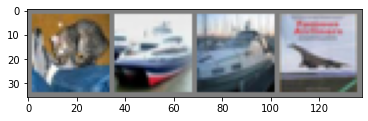

  cat  ship  ship plane


In [91]:
images, labels = dataitr.next()
images = torchvision.utils.make_grid(images)
imshow(images)
print(' '.join('%5s'% classes[labels[j]] for j in range(batch_size)))

## Define a CNN

In [70]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

## Define a Loss function and optimizer

In [71]:
import torch.optim as optim

In [72]:
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

## Train the network

In [73]:
n_epochs = 2

In [74]:
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = loss_criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % 
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finised training')

[1,  2000] loss: 2.060
[1,  4000] loss: 1.974
[1,  6000] loss: 1.971
[1,  8000] loss: 1.976
[1, 10000] loss: 1.975
[1, 12000] loss: 1.960
[2,  2000] loss: 1.938
[2,  4000] loss: 1.979
[2,  6000] loss: 1.927
[2,  8000] loss: 1.943
[2, 10000] loss: 1.945
[2, 12000] loss: 1.949
Finised training


In [75]:
# save the model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## Test the network

In [92]:
dataitr = iter(testloader)

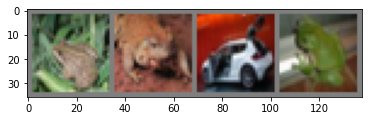

GroundTruth:   frog  frog   car  frog


In [95]:
images, labels = dataitr.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [78]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [79]:
outputs = net(images)
outputs

tensor([[-0.9453,  0.1080, -0.2057,  0.7401, -0.2910,  1.1790,  0.0466, -0.1082,
         -0.5245,  0.5250],
        [ 2.2514,  1.3019,  0.5227, -1.2754, -1.1907, -1.2400, -2.0494, -1.1020,
          2.0602,  0.9694],
        [ 2.2514,  1.3019,  0.5227, -1.2754, -1.1907, -1.2400, -2.0494, -1.1020,
          2.0602,  0.9694],
        [ 2.2514,  1.3019,  0.5227, -1.2754, -1.1907, -1.2400, -2.0494, -1.1020,
          2.0602,  0.9694]], grad_fn=<AddmmBackward>)

In [80]:
_, predicted = torch.max(outputs, 1)
predicted

tensor([5, 0, 0, 0])

In [81]:
print('GroundTruth: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

GroundTruth:    dog plane plane plane


In [82]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(images);
    # print(outputs)
    _, predicted = torch.max(outputs, 1)
    # print(labels, predicted)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    # print(correct)

print('Accuracy of %d test images: %d %%' % (testset.data.shape[0], 100*correct/total))

Accuracy of 10000 test images: 24 %


In [83]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
print(correct_pred, total_pred)

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

{'plane': 0, 'car': 0, 'bird': 0, 'cat': 0, 'deer': 0, 'dog': 0, 'frog': 0, 'horse': 0, 'ship': 0, 'truck': 0} {'plane': 0, 'car': 0, 'bird': 0, 'cat': 0, 'deer': 0, 'dog': 0, 'frog': 0, 'horse': 0, 'ship': 0, 'truck': 0}
Accuracy for class plane is: 54.2 %
Accuracy for class car   is: 35.5 %
Accuracy for class bird  is: 3.0 %
Accuracy for class cat   is: 4.4 %
Accuracy for class deer  is: 34.8 %
Accuracy for class dog   is: 13.7 %
Accuracy for class frog  is: 32.0 %
Accuracy for class horse is: 21.2 %
Accuracy for class ship  is: 6.6 %
Accuracy for class truck is: 44.1 %
